In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [76]:
tweets = pd.read_csv(r'data/tweets.csv')

In [77]:
tweets.head(5)

,id,created_at,sentiment,tweet
0,1280529403915763713,Tue Jul 07 15:49:35 +0000 2020,0,watch them say bp is mocking climate change on...
1,1280529397783674882,Tue Jul 07 15:49:34 +0000 2020,0,rt the temperature in siberia is degrees wil...
2,1280529392611942400,Tue Jul 07 15:49:32 +0000 2020,1,a survey analysis across five federal agencies...
3,1280529387625091073,Tue Jul 07 15:49:31 +0000 2020,1,glad to hear that climate change is not real
4,1280529378753933312,Tue Jul 07 15:49:29 +0000 2020,0,rt id imagine a biodiversity collapse is far ...


In [78]:
tweets.describe()

,id,sentiment
count,3.367600e+04,33676.000000
mean,1.280541e+18,0.455755
std,5.081469e+13,0.498046
min,1.280467e+18,0.000000
25%,1.280511e+18,0.000000
50%,1.280526e+18,0.000000
75%,1.280538e+18,1.000000
max,1.280643e+18,1.000000


In [79]:
tweets['sentiment'].value_counts()

0    18328
1    15348
Name: sentiment, dtype: int64

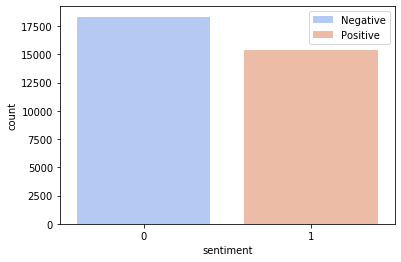

In [86]:
# Count of positive and negative tweets
chart = sns.countplot(x='sentiment',data=tweets, palette='coolwarm', hue='sentiment', dodge=False)
plt.legend(loc='best', labels=['Negative', 'Positive'])
plt.show(chart)

In [82]:
# Storing tokenized tweet and number of words in each tweet 
tweets['tweet_list'] = tweets['tweet'].apply(lambda x:str(x).split())
tweets['num_of_words'] = tweets['tweet'].apply(lambda x:len(str(x).split()))

In [130]:
# Create vocabulary
vocab_counter = Counter([item for sublist in tweets['tweet_list'] for item in sublist])
vocab = list(vocab_counter.keys())

# Looking up top 20 words by word count
temp = pd.DataFrame(vocab_counter.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,26580
1,rt,23079
2,to,15911
3,of,13534
4,and,12615
5,a,12167
6,is,11730
7,in,10914
8,modi,7506
9,i,7425


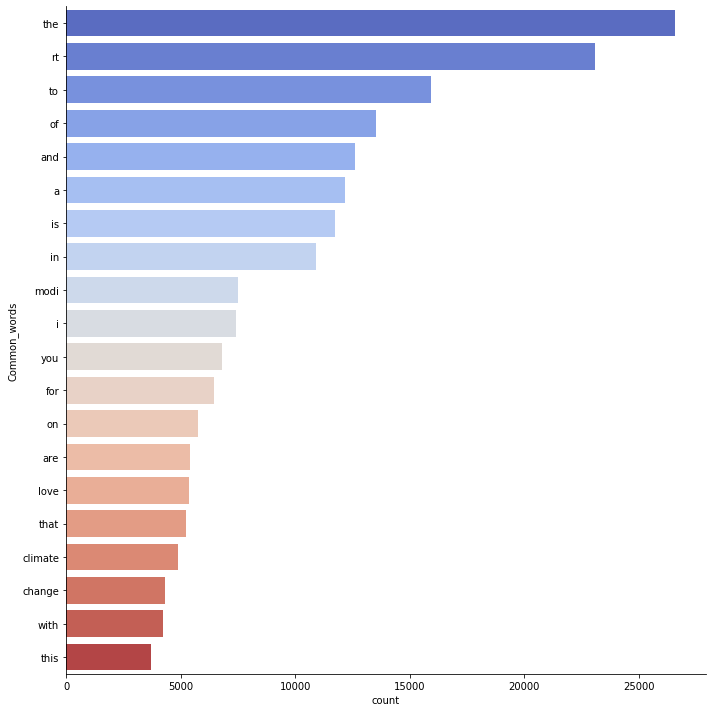

In [119]:
sns.catplot(x='count', y='Common_words',data=temp, palette='coolwarm', kind='bar', height=10, aspect=1, dodge=False)

In [89]:
# Maximum number of words in a tweet in our dataset
tweets['num_of_words'].max()

67

In [120]:
tweets.head(5)

,id,created_at,sentiment,tweet,tweet_list,num_of_words
0,1280529403915763713,Tue Jul 07 15:49:35 +0000 2020,0,watch them say bp is mocking climate change on...,"[watch, them, say, bp, is, mocking, climate, c...",16
1,1280529397783674882,Tue Jul 07 15:49:34 +0000 2020,0,rt the temperature in siberia is degrees wil...,"[rt, the, temperature, in, siberia, is, degree...",23
2,1280529392611942400,Tue Jul 07 15:49:32 +0000 2020,1,a survey analysis across five federal agencies...,"[a, survey, analysis, across, five, federal, a...",34
3,1280529387625091073,Tue Jul 07 15:49:31 +0000 2020,1,glad to hear that climate change is not real,"[glad, to, hear, that, climate, change, is, no...",9
4,1280529378753933312,Tue Jul 07 15:49:29 +0000 2020,0,rt id imagine a biodiversity collapse is far ...,"[rt, id, imagine, a, biodiversity, collapse, i...",24


In [134]:
def get_word_index_dictionary():
    """ creates word_to_index and index_to_word dictionaries """
    word_to_index = {}
    index_to_word = {}   
    for index,word in enumerate(vocab):
        word_to_index[word] = index
        index_to_word[index] = word   
    return word_to_index, index_to_word

In [137]:
# Creating dictionaries to convert text data to numbers and vice versa
word_to_index, index_to_word = get_word_index_dictionary()

# climate -> 6
print(word_to_index.get('climate'))
print(index_to_word.get(6))

6
climate


In [139]:
# Deep learning: 
from keras.models import Input, Model
from keras.layers import LSTM, Dense, Embedding, concatenate, Dropout, concatenate
from keras.layers import Bidirectional, RNN

ModuleNotFoundError: No module named 'keras'

In [140]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'